# Modelling - anxiety

In [77]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn import svm
from sklearn.preprocessing import label_binarize
from itertools import cycle


In [78]:
depression_data = pd.read_csv("depression_data.csv")

### I will do the first model for depression, without balancing. To see how it is.


#### X/y split

In [79]:
X_depression = depression_data.drop("severeness_level_depression", axis = 1)
y_depression = depression_data["severeness_level_depression"]

In [80]:
X_train_dep, X_test_dep, y_train_dep, y_test_dep = train_test_split(X_depression, y_depression, test_size = 0.20, random_state = 123)

In [81]:
# Standardizing the dataframe.

std_scaler = StandardScaler().fit(X_train_dep)
X_depression_train_scaled = std_scaler.transform(X_train_dep)
X_depression_test_scaled = std_scaler.transform(X_test_dep)

#### Logistic regression

,Error_metric,Train,Test
0,Accuracy,0.998522,0.998365
1,Precision,0.998584,0.998790
2,Recall,0.997046,0.996577


Confusion matrix for the train set
[[ 4834     0     0]
 [   13  5256    34]
 [    0     0 21670]]


/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


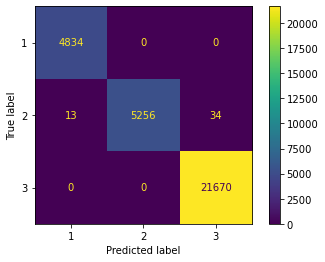



Confusion matrix for the test set
[[1236    0    0]
 [   2 1253   11]
 [   0    0 5450]]


/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


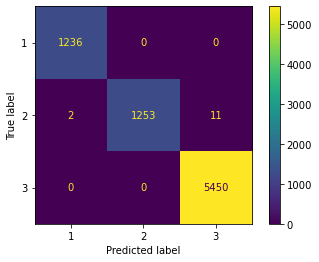

In [82]:
log_model = LogisticRegression(multi_class='ovr') 
log_model.fit(X_depression_train_scaled, y_train_dep)
y_pred_train_log_dep = log_model.predict(X_depression_train_scaled)
y_pred_test_log_dep = log_model.predict(X_depression_test_scaled)

performance_log_dep = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train_dep, y_pred_train_log_dep),
                                         precision_score(y_train_dep, y_pred_train_log_dep, average = "macro"),
                                         recall_score(y_train_dep, y_pred_train_log_dep, average = "macro")],
                               'Test': [accuracy_score(y_test_dep, y_pred_test_log_dep),
                                        precision_score(y_test_dep, y_pred_test_log_dep, average = "macro"),
                                        recall_score(y_test_dep, y_pred_test_log_dep, average = "macro")]})

display(performance_log_dep)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train_dep,y_pred_train_log_dep))
plot_confusion_matrix(log_model,X_depression_train_scaled,y_train_dep, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test_dep, y_pred_test_log_dep))
plot_confusion_matrix(log_model,X_depression_test_scaled,y_test_dep, values_format = 'd')
plt.show()

#### KNN

,Error_metric,Train,Test
0,Accuracy,0.945735,0.915241
1,Precision,0.907806,0.852102
2,Recall,0.908081,0.856909


Confusion matrix for the train set
[[ 4679   155     0]
 [  791  4101   411]
 [    7   362 21301]]


/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


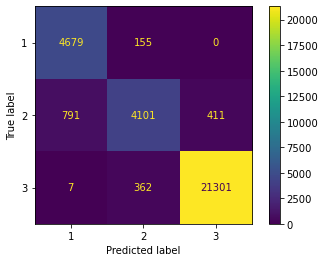



Confusion matrix for the test set
[[1174   62    0]
 [ 283  826  157]
 [   1  171 5278]]


/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


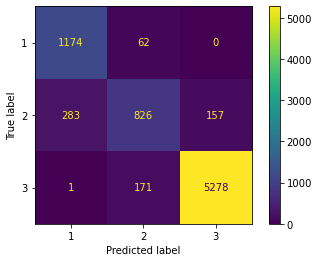

In [83]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_depression_train_scaled, y_train_dep)
y_pred_train_log_dep = knn_model.predict(X_depression_train_scaled)
y_pred_test_log_dep = knn_model.predict(X_depression_test_scaled)

performance_log_dep = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train_dep, y_pred_train_log_dep),
                                         precision_score(y_train_dep, y_pred_train_log_dep, average = "macro"),
                                         recall_score(y_train_dep, y_pred_train_log_dep, average = "macro")],
                               'Test': [accuracy_score(y_test_dep, y_pred_test_log_dep),
                                        precision_score(y_test_dep, y_pred_test_log_dep, average = "macro"),
                                        recall_score(y_test_dep, y_pred_test_log_dep, average = "macro")]})

display(performance_log_dep)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train_dep,y_pred_train_log_dep))
plot_confusion_matrix(knn_model,X_depression_train_scaled,y_train_dep, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test_dep, y_pred_test_log_dep))
plot_confusion_matrix(knn_model,X_depression_test_scaled,y_test_dep, values_format = 'd')
plt.show()

#### Decision tree

,Error_metric,Train,Test
0,Accuracy,0.850567,0.847711
1,Precision,0.779224,0.770413
2,Recall,0.745595,0.740907


Confusion matrix for the train set
[[ 3334   526    44]
 [ 1421  3177  1083]
 [   79  1600 20543]]


/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


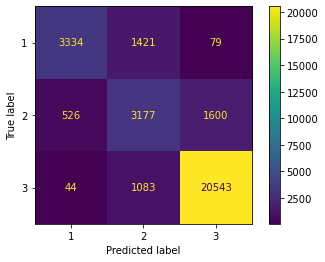



Confusion matrix for the test set
[[ 845  133   13]
 [ 373  754  295]
 [  18  379 5142]]


/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


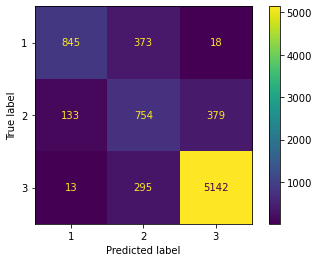

In [84]:
dt = DecisionTreeClassifier(max_depth=4)

dt.fit(X_train_dep, y_train_dep)

y_pred_train_dt_dep = dt.predict(X_train_dep)
y_pred_test_dt_dep = dt.predict(X_test_dep)


performance_df_dep = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train_dep, y_pred_train_dt_dep),
                                         precision_score(y_train_dep, y_pred_train_dt_dep, average = "macro"),
                                         recall_score(y_train_dep, y_pred_train_dt_dep, average = "macro")],
                               'Test': [accuracy_score(y_test_dep, y_pred_test_dt_dep),
                                        precision_score(y_test_dep, y_pred_test_dt_dep, average = "macro"),
                                        recall_score(y_test_dep, y_pred_test_dt_dep, average = "macro")]})

display(performance_df_dep)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train_dep,y_pred_train_dt_dep).T)
plot_confusion_matrix(dt,X_train_dep,y_train_dep, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test_dep,y_pred_test_dt_dep).T)
plot_confusion_matrix(dt,X_test_dep,y_test_dep, values_format = 'd')
plt.show()

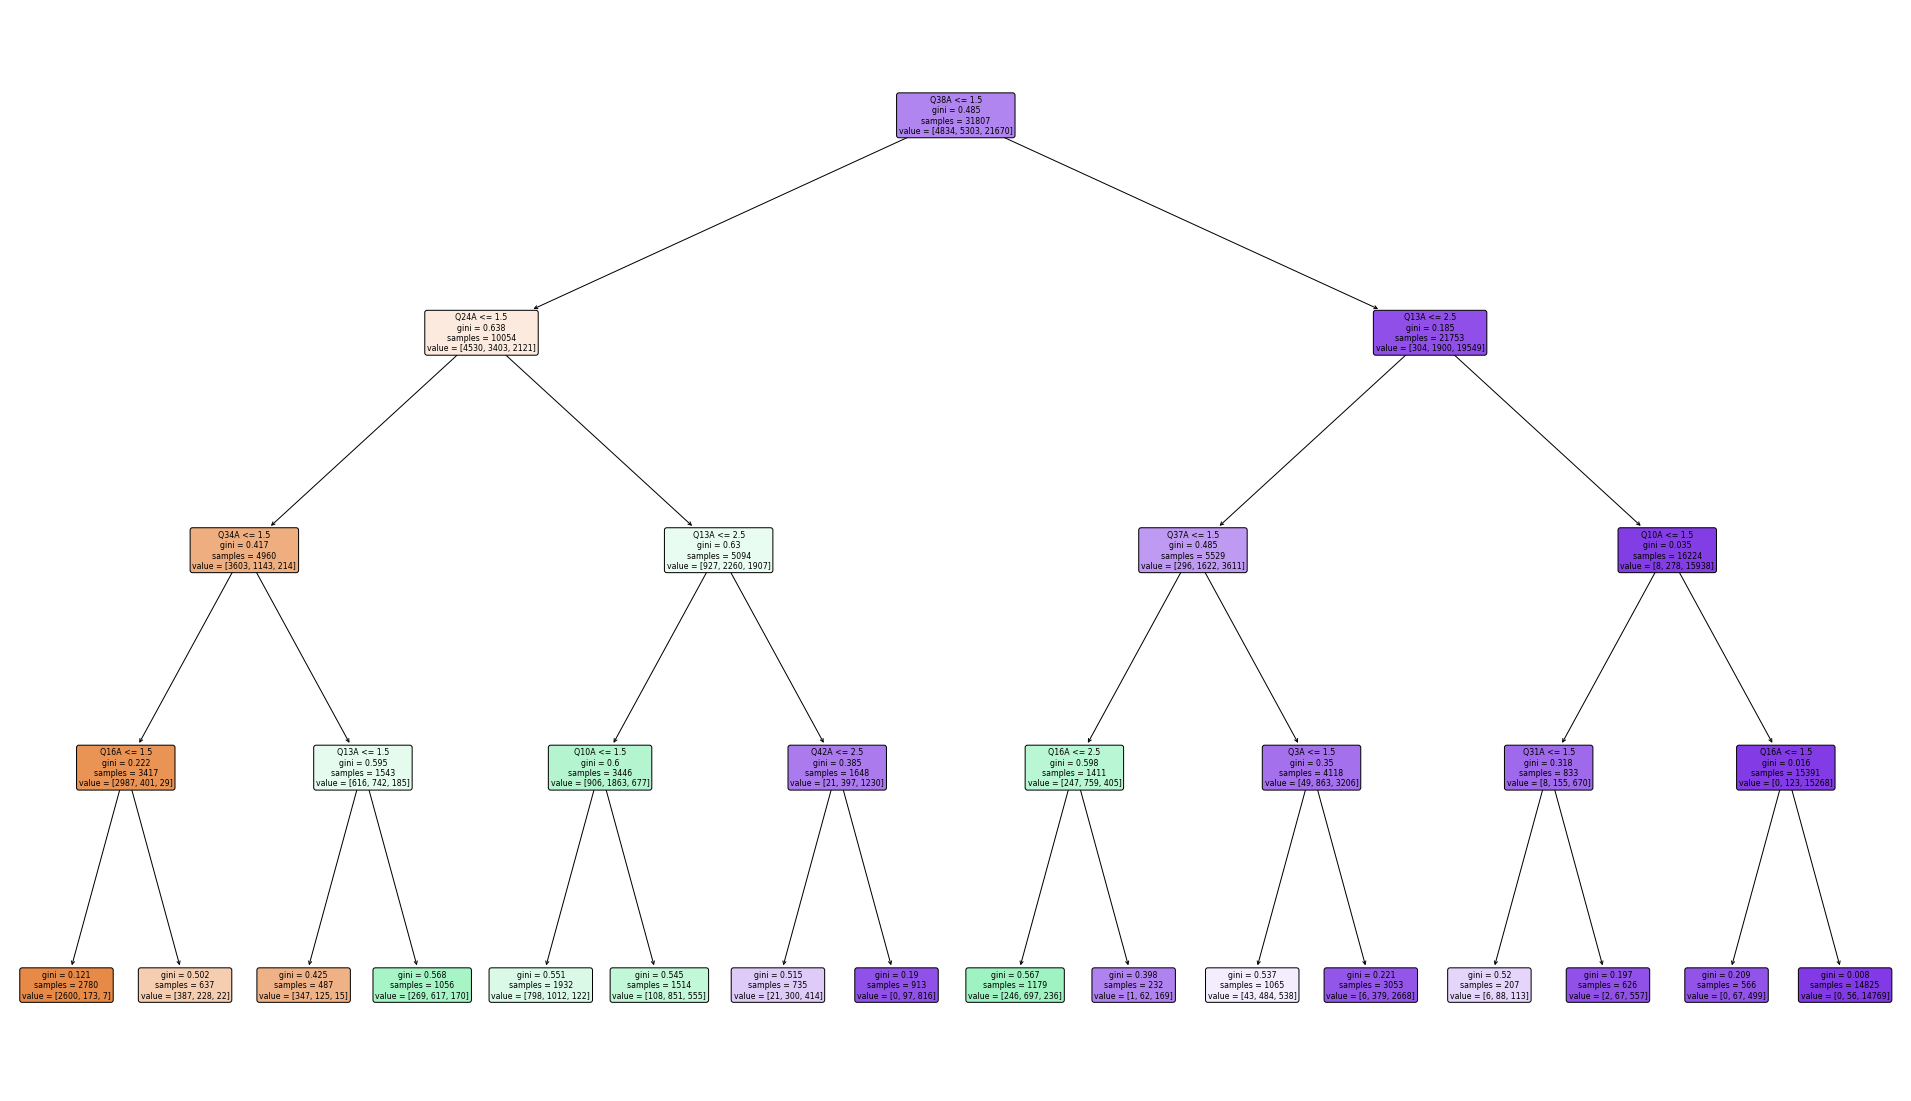

In [85]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))

plot_tree(dt,filled = True, rounded=True,feature_names=X_depression.columns)
plt.show()

#### Random forest

In [86]:
# Applying the random forest.
# max_features="sqrt" - this didn't change the final scores.
# Max_depth - less is better, if I have higher nr the scores are more than 90, maybe too good?
# Nr of estimators - tried with 30, 20, 50, 40 - scores didn't change much (only for 20)

clf = RandomForestClassifier(max_depth=4, n_estimators=30, random_state=0, bootstrap=True, oob_score=True)
clf.fit(X_train_dep, y_train_dep)
print(clf.score(X_train_dep, y_train_dep))
print(clf.score(X_test_dep, y_test_dep))

0.9105228408840821
0.9079476861167002


In [87]:
# Cross validation, accuracy scores.

clf = RandomForestClassifier(max_depth=4, n_estimators=30, random_state=0, bootstrap=True, oob_score=True)
cross_val_scores_dep = cross_val_score(clf, X_train_dep, y_train_dep, cv=5)
cross_val_scores_dep

array([0.90616158, 0.90804778, 0.90646125, 0.90803333, 0.90677566])

In [88]:
np.mean(cross_val_scores_dep)

0.9070959217302901

### Solving the imbalancement for depression

In [89]:
# Checking the imbalance
# Classes: 1 (moderate), 2 (severe), 3 (extremely severe)

y_depression.value_counts()

3    27120
2     6569
1     6070
Name: severeness_level_depression, dtype: int64

In [90]:
# I will downsample class 3 and upsample class 1 to have the same amount of values than class 2.

class_1_dep = depression_data[depression_data["severeness_level_depression"] == 1]
class_2_dep = depression_data[depression_data["severeness_level_depression"] == 2]
class_3_dep = depression_data[depression_data["severeness_level_depression"] == 3]

In [91]:
class_3_dep_down = class_3_dep.sample(len(class_2_dep,))

In [92]:
class_1_dep_up = class_1_dep.sample(len(class_2_dep), replace=True)

In [93]:
depression_data_balanced = pd.concat([class_1_dep_up, class_2_dep, class_3_dep_down], axis=0)

depression_data_balanced = depression_data_balanced.sample(frac=1)
depression_data_balanced["severeness_level_depression"].value_counts() 

3    6569
2    6569
1    6569
Name: severeness_level_depression, dtype: int64

### Modelling with depression data, balanced

In [94]:
X_dep_bal = depression_data_balanced.drop("severeness_level_depression", axis = 1)
y_dep_bal = depression_data_balanced["severeness_level_depression"]

In [95]:
X_train_dep_bal, X_test_dep_bal, y_train_dep_bal, y_test_dep_bal = train_test_split(X_dep_bal, y_dep_bal, test_size = 0.20, random_state = 123)



In [96]:
# Standardizing the dataframe.

std_scaler = StandardScaler().fit(X_train_dep_bal)
X_dep_bal_train_scaled = std_scaler.transform(X_train_dep_bal)
X_dep_bal_test_scaled = std_scaler.transform(X_test_dep_bal)

#### Logistic regression

,Error_metric,Train,Test
0,Accuracy,0.999112,0.998478
1,Precision,0.999113,0.998495
2,Recall,0.999109,0.998485


Confusion matrix for the train set
[[5228    0    0]
 [   9 5225    5]
 [   0    0 5298]]


/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


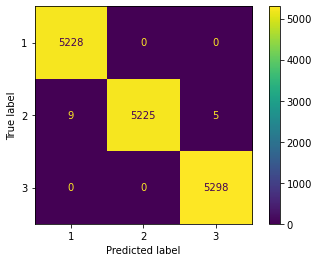



Confusion matrix for the test set
[[1341    0    0]
 [   4 1325    1]
 [   0    1 1270]]


/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


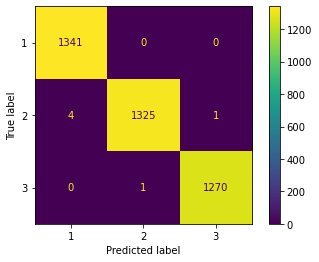

In [97]:
log_model = LogisticRegression(multi_class='ovr') 
log_model.fit(X_dep_bal_train_scaled, y_train_dep_bal)
y_pred_train_log_dep_bal = log_model.predict(X_dep_bal_train_scaled)
y_pred_test_log_dep_bal = log_model.predict(X_dep_bal_test_scaled)

performance_log_dep_bal = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train_dep_bal, y_pred_train_log_dep_bal),
                                         precision_score(y_train_dep_bal, y_pred_train_log_dep_bal, average = "macro"),
                                         recall_score(y_train_dep_bal, y_pred_train_log_dep_bal, average = "macro")],
                               'Test': [accuracy_score(y_test_dep_bal, y_pred_test_log_dep_bal),
                                        precision_score(y_test_dep_bal, y_pred_test_log_dep_bal, average = "macro"),
                                        recall_score(y_test_dep_bal, y_pred_test_log_dep_bal, average = "macro")]})

display(performance_log_dep_bal)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train_dep_bal,y_pred_train_log_dep_bal))
plot_confusion_matrix(log_model,X_dep_bal_train_scaled,y_train_dep_bal, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test_dep_bal, y_pred_test_log_dep_bal))
plot_confusion_matrix(log_model,X_dep_bal_test_scaled,y_test_dep_bal, values_format = 'd')
plt.show()

#### KNN

,Error_metric,Train,Test
0,Accuracy,0.886140,0.844242
1,Precision,0.894013,0.858906
2,Recall,0.886212,0.843897


Confusion matrix for the train set
[[5184   44    0]
 [1145 4088    6]
 [   6  594 4698]]


/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


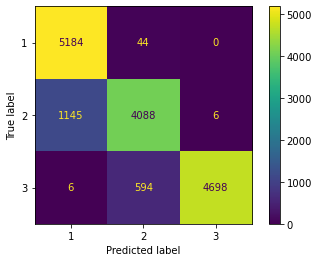



Confusion matrix for the test set
[[1311   30    0]
 [ 385  942    3]
 [   0  196 1075]]


/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


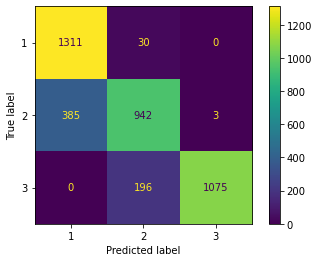

In [98]:
knn_model = KNeighborsClassifier(n_neighbors=6)
knn_model.fit(X_dep_bal_train_scaled, y_train_dep_bal)
y_pred_train_log_dep_bal = knn_model.predict(X_dep_bal_train_scaled)
y_pred_test_log_dep_bal = knn_model.predict(X_dep_bal_test_scaled)

performance_log_dep_bal = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train_dep_bal, y_pred_train_log_dep_bal),
                                         precision_score(y_train_dep_bal, y_pred_train_log_dep_bal, average = "macro"),
                                         recall_score(y_train_dep_bal, y_pred_train_log_dep_bal, average = "macro")],
                               'Test': [accuracy_score(y_test_dep_bal, y_pred_test_log_dep_bal),
                                        precision_score(y_test_dep_bal, y_pred_test_log_dep_bal, average = "macro"),
                                        recall_score(y_test_dep_bal, y_pred_test_log_dep_bal, average = "macro")]})

display(performance_log_dep_bal)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train_dep_bal,y_pred_train_log_dep_bal))
plot_confusion_matrix(knn_model,X_dep_bal_train_scaled,y_train_dep_bal, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test_dep_bal, y_pred_test_log_dep_bal))
plot_confusion_matrix(knn_model,X_dep_bal_test_scaled,y_test_dep_bal, values_format = 'd')
plt.show()

#### Decision tree

,Error_metric,Train,Test
0,Accuracy,0.819854,0.805429
1,Precision,0.844094,0.833677
2,Recall,0.819898,0.805074


Confusion matrix for the train set
[[4106  560   11]
 [1122 4572 1040]
 [   0  107 4247]]


/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


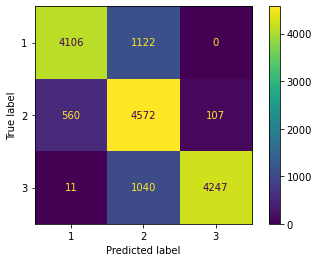



Confusion matrix for the test set
[[1045  150    2]
 [ 296 1143  282]
 [   0   37  987]]


/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


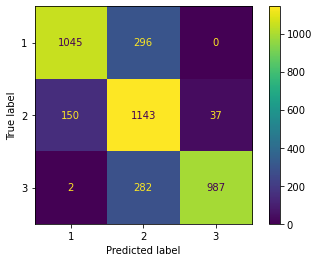

In [99]:
dt = DecisionTreeClassifier(max_depth=5)

dt.fit(X_train_dep_bal, y_train_dep_bal)

y_pred_train_dt_dep_bal = dt.predict(X_train_dep_bal)
y_pred_test_dt_dep_bal = dt.predict(X_test_dep_bal)


performance_df_dep_bal = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train_dep_bal, y_pred_train_dt_dep_bal),
                                         precision_score(y_train_dep_bal, y_pred_train_dt_dep_bal, average = "macro"),
                                         recall_score(y_train_dep_bal, y_pred_train_dt_dep_bal, average = "macro")],
                               'Test': [accuracy_score(y_test_dep_bal, y_pred_test_dt_dep_bal),
                                        precision_score(y_test_dep_bal, y_pred_test_dt_dep_bal, average = "macro"),
                                        recall_score(y_test_dep_bal, y_pred_test_dt_dep_bal, average = "macro")]})

display(performance_df_dep_bal)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train_dep_bal,y_pred_train_dt_dep_bal).T)
plot_confusion_matrix(dt,X_train_dep_bal,y_train_dep_bal, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test_dep_bal,y_pred_test_dt_dep_bal).T)
plot_confusion_matrix(dt,X_test_dep_bal,y_test_dep_bal, values_format = 'd')
plt.show()

#### Random forest

In [100]:
clf = RandomForestClassifier(max_depth=4, n_estimators=25, random_state=0, bootstrap=True, oob_score=True)
clf.fit(X_train_dep_bal, y_train_dep_bal)
print(clf.score(X_train_dep_bal, y_train_dep_bal))
print(clf.score(X_test_dep_bal, y_test_dep_bal))

0.8875356803044719
0.8703703703703703


/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


In [101]:
y_pred_dep = clf.predict(X_test_dep_bal)
y_pred_dep

array([1, 3, 3, ..., 1, 1, 1])

In [102]:
# Getting the precision and recall scores

print(classification_report(y_test_dep_bal,y_pred_dep))
print(accuracy_score(y_test_dep_bal, y_pred_dep))

              precision    recall  f1-score   support

           1       0.90      0.86      0.88      1341
           2       0.77      0.88      0.82      1330
           3       0.98      0.87      0.92      1271

    accuracy                           0.87      3942
   macro avg       0.88      0.87      0.87      3942
weighted avg       0.88      0.87      0.87      3942

0.8703703703703703


In [103]:
# Using cross validation. Receiving accuracy scores.

clf = RandomForestClassifier(max_depth=4, n_estimators=25, random_state=0, bootstrap=True, oob_score=True)
cross_val_scores_dep_bal = cross_val_score(clf, X_train_dep_bal, y_train_dep_bal, cv=5)
cross_val_scores_dep_bal

/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/miumiu/opt/anaconda3/envs

array([0.8943863 , 0.89692356, 0.89470346, 0.89343482, 0.88392008])

In [104]:
np.mean(cross_val_scores_dep_bal)

0.89267364414843

#### Hyperparameters and grid search

In [105]:
# Setting parameter values for finding out which gives the best model.

param_grid_dep = {
    "n_estimators": [15, 20, 30],
    "min_samples_split": [2, 4],
    "min_samples_leaf" : [1, 2],
    "max_features": ["sqrt"],
    "max_depth": [8],
    }
clf = RandomForestClassifier(random_state=100)

In [106]:
# Setting the grid search.

grid_search_depression = GridSearchCV(clf, param_grid_dep, cv=5, return_train_score=True, n_jobs=-1,)

In [107]:
# Applying it.

grid_search_depression.fit(X_train_dep_bal,y_train_dep_bal)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [8], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': [15, 20, 30]},
             return_train_score=True)

In [108]:
# Which are the best parameters.

grid_search_depression.best_params_

{'max_depth': 8,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 30}

In [109]:
pd.DataFrame(grid_search_depression.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.248124,0.002917,0.015525,0.000517,8,sqrt,1,2,15,"{'max_depth': 8, 'max_features': 'sqrt', 'min_...",...,0.930352,0.003342,10,0.953853,0.951554,0.952506,0.949968,0.948065,0.951189,0.002011
1,0.331274,0.002982,0.020289,0.001729,8,sqrt,1,2,20,"{'max_depth': 8, 'max_features': 'sqrt', 'min_...",...,0.932826,0.003353,8,0.952902,0.953219,0.952347,0.950603,0.952268,0.952268,0.000904
2,0.482410,0.004015,0.026419,0.000230,8,sqrt,1,2,30,"{'max_depth': 8, 'max_features': 'sqrt', 'min_...",...,0.937520,0.003055,4,0.956787,0.958135,0.956787,0.955756,0.956946,0.956882,0.000756
3,0.247146,0.004733,0.015402,0.000658,8,sqrt,1,4,15,"{'max_depth': 8, 'max_features': 'sqrt', 'min_...",...,0.931684,0.005005,9,0.954964,0.949017,0.951475,0.950603,0.952347,0.951681,0.001976
4,0.322590,0.003278,0.018261,0.001287,8,sqrt,1,4,20,"{'max_depth': 8, 'max_features': 'sqrt', 'min_...",...,0.934475,0.004456,5,0.956074,0.953774,0.951158,0.951237,0.955598,0.953568,0.002083
5,0.482213,0.006359,0.026750,0.001330,8,sqrt,1,4,30,"{'max_depth': 8, 'max_features': 'sqrt', 'min_...",...,0.938091,0.003436,3,0.956311,0.956629,0.957104,0.955598,0.956629,0.956454,0.000497
6,0.244699,0.002831,0.016032,0.000572,8,sqrt,2,2,15,"{'max_depth': 8, 'max_features': 'sqrt', 'min_...",...,0.929908,0.002036,11,0.950761,0.948224,0.950523,0.951633,0.952426,0.950714,0.001415
7,0.329274,0.002686,0.019362,0.000875,8,sqrt,2,2,20,"{'max_depth': 8, 'max_features': 'sqrt', 'min_...",...,0.934158,0.004089,6,0.953061,0.954329,0.952664,0.952030,0.953933,0.953203,0.000835
8,0.471692,0.005947,0.026266,0.000476,8,sqrt,2,2,30,"{'max_depth': 8, 'max_features': 'sqrt', 'min_...",...,0.939486,0.003596,1,0.956232,0.955994,0.957580,0.956549,0.956787,0.956629,0.000547
9,0.241628,0.002307,0.015070,0.000954,8,sqrt,2,4,15,"{'max_depth': 8, 'max_features': 'sqrt', 'min_...",...,0.929908,0.002036,11,0.950761,0.948224,0.950523,0.951633,0.952426,0.950714,0.001415


In [110]:
# Checking the result with cross validation.

clf = RandomForestClassifier(random_state=0, max_depth=8, 
                             min_samples_leaf=1, min_samples_split=4, n_estimators=30, bootstrap=True, oob_score=True)
cross_val_scores_dep = cross_val_score(clf, X_train_dep_bal, y_train_dep_bal, cv=5)
print(np.mean(cross_val_scores_dep))

0.937836980653346


#### Principal Component Analysis

In [111]:
# Setting the nr of components.

pca_dep = PCA(n_components=18)
pca_dep_fit = pca_dep.fit(X_dep_bal_train_scaled)

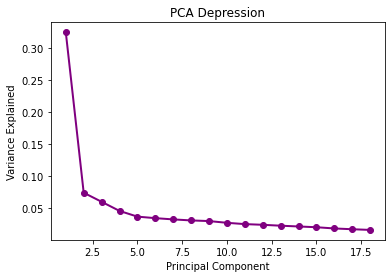

In [112]:
# Plot, where I can see how much each of the seven components contributes.

PC_values_dep = np.arange(pca_dep.n_components_) + 1
plt.plot(PC_values_dep, pca_dep.explained_variance_ratio_, 'o-', linewidth=2, color='purple')
plt.title('PCA Depression')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [113]:
# To get the variance value for each principal component.

print(pca_dep.explained_variance_ratio_)

[0.32436034 0.07402852 0.05989695 0.04566499 0.03673877 0.03436585
 0.03242109 0.03081973 0.02981389 0.02711429 0.02507693 0.02399441
 0.02258614 0.0213913  0.02020276 0.01830114 0.01707206 0.01601597]


In [114]:
# Another way

std_scaler = StandardScaler()
X_pca_scaled = std_scaler.fit_transform(X_dep_bal)

In [115]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca_scaled, y_dep_bal, test_size = 0.20, random_state = 123)

In [116]:
# Set the variance %.
# Leave 95% of information.
pca_depr = PCA(.85)

In [117]:
# Fit the training set.

X_pca_fitted = pca_depr.fit_transform(X_train_pca)

In [118]:
# How many principal components to get 95% variance?

X_pca_fitted.shape

(15765, 18)

In [119]:
pca_depr.explained_variance_ratio_

array([0.32533854, 0.07375218, 0.05986088, 0.04556402, 0.03651271,
       0.03427003, 0.03241392, 0.0306707 , 0.02976035, 0.02706112,
       0.02505729, 0.02394832, 0.02261803, 0.02127264, 0.02013028,
       0.01823315, 0.01710814, 0.01610685])

In [120]:
# Model

X_train_pca_, X_test_pca_, y_train_pca_, y_test_pca_ = train_test_split(X_pca_fitted, y_train_pca, test_size = 0.20, random_state = 123)

In [121]:
model = RandomForestClassifier(max_depth=8, n_estimators=30, random_state=77, bootstrap=True, oob_score=True)
model.fit(X_train_pca, y_train_pca)
model.score(X_test_pca, y_test_pca)

/Users/miumiu/opt/anaconda3/envs/DA_ENV/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


0.9249112125824455

In [122]:
### Another way

pca = PCA() # create a PCA object
pca.fit(X_train_pca) # do the math
pca_data = pca.transform(X_train_pca) # get PCA coordinates for scaled_data

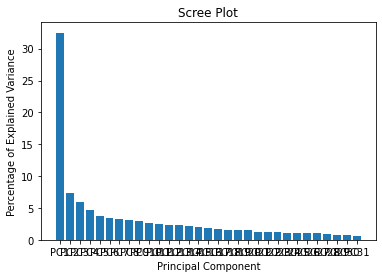

In [123]:
#The following code constructs the Scree plot
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

#### Feature importance

In [124]:
feature_names_depression = X_train_dep_bal.columns
feature_names_depression = list(feature_names_depression)

In [125]:
clf.fit(X_train_dep_bal, y_train_dep_bal)

RandomForestClassifier(max_depth=8, min_samples_split=4, n_estimators=30,
                       oob_score=True, random_state=0)

In [126]:
depression_feature_df = pd.DataFrame(list(zip(feature_names_depression, clf.feature_importances_)))
depression_feature_df.columns = ['columns_name', 'score_feature_importance']
depression_feature_df.sort_values(by=['score_feature_importance'], ascending = False)

,columns_name,score_feature_importance
3,Q13A,0.152252
2,Q10A,0.113168
6,Q21A,0.104052
5,Q17A,0.087302
7,Q24A,0.068970
10,Q34A,0.065768
4,Q16A,0.063112
8,Q26A,0.057601
12,Q38A,0.057195
1,Q5A,0.042072


#### Model with selected features

In [127]:
final_features_depression = depression_data_balanced[["Q13A", "Q21A", "Q10A", "Q17A", "Q34A", "Q24A", "Q16A", "Q5A", "Q26A", "Q31A", "Q3A", "Q38A", "Q37A", "Q42A", "emotional_stability", "severeness_level_anxiety", "conscientiousness", "extraversion", "age"]]
y_dep_bal = depression_data_balanced["severeness_level_depression"]

In [128]:
X_train_dep_f, X_test_dep_f, y_train_dep_f, y_test_dep_f = train_test_split(final_features_depression, y_dep_bal, test_size = 0.20, random_state = 123)


In [129]:
# I choose random forest as this was the model so far. I will use the parameters from the grid search.

clf = RandomForestClassifier(max_depth=8, n_estimators=30, random_state=0, bootstrap=True, oob_score=True)
cross_val_scores_dep_f = cross_val_score(clf, X_train_dep_f, y_train_dep_f, cv=5)
cross_val_scores_dep_f

array([0.94005709, 0.93434824, 0.93434824, 0.93339676, 0.93371392])

In [130]:
np.mean(cross_val_scores_dep_f)

0.9351728512527752

#### AUC/ROC curve - for future exploration

In [131]:
# ROC AUC with random forest
#X_train_dep_bal, X_test_dep_bal, y_train_dep_bal, y_test_dep_bal

model_multiclass = RandomForestClassifier(n_estimators = 30, criterion = 'gini')

In [132]:
model_multiclass.fit(X_train_dep_bal, y_train_dep_bal)

RandomForestClassifier(n_estimators=30)

In [133]:
y_pred = model_multiclass.predict(X_test_dep_bal)

In [134]:
y_proba = model_multiclass.predict_proba(X_test_dep_bal)

In [135]:
classes = model_multiclass.classes_
classes

array([1, 2, 3])

In [136]:
def get_all_roc_coordinates(y_real, y_proba):
    '''
    Calculates all the ROC Curve coordinates (tpr and fpr) by considering each point as a treshold for the predicion of the class.
    
    Args:
        y_real: The list or series with the real classes.
        y_proba: The array with the probabilities for each class, obtained by using the `.predict_proba()` method.
        
    Returns:
        tpr_list: The list of TPRs representing each threshold.
        fpr_list: The list of FPRs representing each threshold.
    '''
    tpr_list = [0]
    fpr_list = [0]
    for i in range(len(y_proba)):
        threshold = y_proba[i]
        y_pred = y_proba >= threshold
        tpr, fpr = calculate_tpr_fpr(y_real, y_pred)
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    return tpr_list, fpr_list

In [137]:
def plot_roc_curve(tpr, fpr, scatter = True, ax = None):
    '''
    Plots the ROC Curve by using the list of coordinates (tpr and fpr).
    
    Args:
        tpr: The list of TPRs representing each coordinate.
        fpr: The list of FPRs representing each coordinate.
        scatter: When True, the points used on the calculation will be plotted with the line (default = True).
    '''
    if ax == None:
        plt.figure(figsize = (5, 5))
        ax = plt.axes()
    
    if scatter:
        sns.scatterplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = [0, 1], y = [0, 1], color = 'green', ax = ax)
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

In [138]:
def calculate_tpr_fpr(y_real, y_pred):
    '''
    Calculates the True Positive Rate (tpr) and the True Negative Rate (fpr) based on real and predicted observations
    
    Args:
        y_real: The list or series with the real classes
        y_pred: The list or series with the predicted classes
        
    Returns:
        tpr: The True Positive Rate of the classifier
        fpr: The False Positive Rate of the classifier
    '''
    
    # Calculates the confusion matrix and recover each element
    cm = confusion_matrix(y_real, y_pred)
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TP = cm[1, 1]
    
    # Calculates tpr and fpr
    tpr =  TP/(TP + FN) # sensitivity - true positive rate
    fpr = 1 - TN/(TN+FP) # 1-specificity - false positive rate
    
    return tpr, fpr

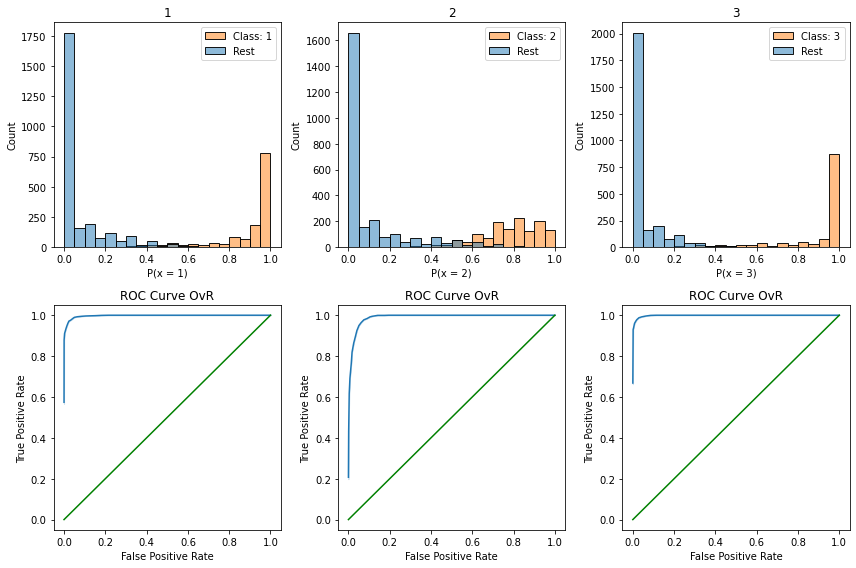

In [139]:
# Plots the Probability Distributions and the ROC Curves One vs Rest
plt.figure(figsize = (12, 8))
bins = [i/20 for i in range(20)] + [1]
roc_auc_ovr = {}

for i in range(len(classes)):
    # Gets the class
    c = classes[i]
    
    # Prepares an auxiliar dataframe to help with the plots
    df_aux = X_test_dep_bal.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_test_dep_bal]
    df_aux['prob'] = y_proba[:, i]
    df_aux = df_aux.reset_index(drop = True)
    
    # Plots the probability distribution for the class and the rest
    ax = plt.subplot(2, 3, i+1)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(c)
    ax.legend([f"Class: {c}", "Rest"])
    ax.set_xlabel(f"P(x = {c})")
    
    # Calculates the ROC Coordinates and plots the ROC Curves
    ax_bottom = plt.subplot(2, 3, i+4)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvR")
    
    # Calculates the ROC AUC OvR
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
    
plt.tight_layout()

In [140]:
# Displays the ROC AUC for each class
avg_roc_auc = 0
i = 0
for k in roc_auc_ovr:
    avg_roc_auc += roc_auc_ovr[k]
    i += 1
    print(f"{k} ROC AUC OvR: {roc_auc_ovr[k]:.4f}")
print(f"average ROC AUC OvR: {avg_roc_auc/i:.4f}")

1 ROC AUC OvR: 0.9975
2 ROC AUC OvR: 0.9892
3 ROC AUC OvR: 0.9987
average ROC AUC OvR: 0.9951


### Conclusion

In [141]:
# Models perform better after balancing. 
# Logistic regression has too good performance.
# The best model is random forest with cross validation after grid search - 0.929.
# Random forest after selected features is as good - 0.933
# Random forest with PCA ias as good - 0.931
# I could even use smaller parameters for grid search?
# Why logistic regression performs almost perfectly?


# 3 most important features: Q13, Q21, Q10
# Most important personality features: emotional stability, conscientiousness
# Most important demographic: age

# Q13: I felt sad and depressed.
# Q21: I felt that life wasn't worthwhile.
# Q10: I felt that I had nothing to look forward to.